In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

#PredictionRiskModels 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the actual cleaned dataset
df = pd.read_csv('cleaned_diabetes_prediction_dataset.csv')

# Check the first few rows
print(df.head())

   gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0     1.0  80.0             0              1  25.19          6.6   
1     1.0  54.0             0              0  27.32          6.6   
2     0.0  28.0             0              0  27.32          5.7   
3     1.0  36.0             0              0  23.45          5.0   
4     0.0  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  systolic_bp  diastolic_bp  
0                  140         0          139            84  
1                   80         0          136            75  
2                  158         0          117            60  
3                  155         0          115            78  
4                  155         0          163            88  


In [4]:
# Split data into features (X) and target (y)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [5]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling: Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

✅ Random Forest - Accuracy: 97.21%, F1-score: 0.97


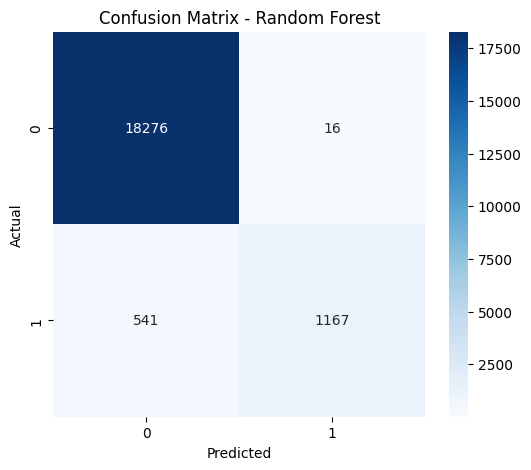


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [6]:
#Random Forest Model

rf_model = RandomForestClassifier(
    n_estimators=300,       # จำนวนต้นไม้ในป่า 
    max_depth=None,         # ความลึกของต้นไม้ 
    min_samples_split=10,   # จำนวนขั้นต่ำของตัวอย่างที่ต้องมีเพื่อแบ่ง node ใหม่ 
    random_state=42,        # ตั้งค่า random เพื่อให้ผลลัพธ์คงที่
    n_jobs=-1               # ใช้ทุก CPU Core เพื่อให้เทรนเร็วขึ้น
)

# Train
rf_model.fit(X_train_scaled, y_train)

# Test
rf_pred = rf_model.predict(X_test_scaled)

# Find Accuracy
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = classification_report(y_test, rf_pred, output_dict=True)['weighted avg']['f1-score']


#Step 7: Show Result
#Random Forest Model
# Show Result
print(f"✅ Random Forest - Accuracy: {rf_acc*100:.2f}%, F1-score: {rf_f1:.2f}")

# Show Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Show Classification Report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

✅ XGBoost - Accuracy: 97.23%, F1-score: 0.97


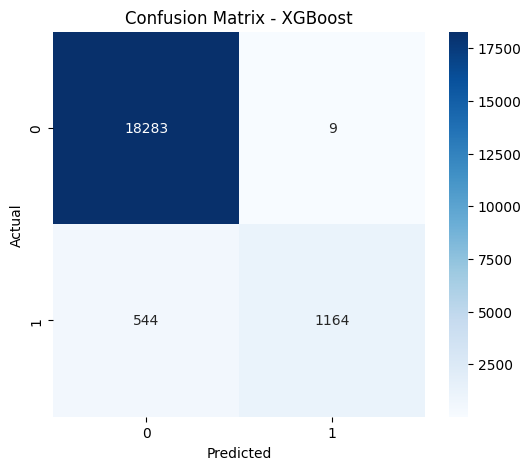


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [7]:
#XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=300,   # จำนวนต้นไม้ในป่า 
    learning_rate=0.01,  # อัตราการเรียนรู้
    max_depth=9,        # ความลึกของต้นไม้ 
    eval_metric='logloss',
    random_state=42
)

# Train
xgb_model.fit(X_train_scaled, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test_scaled)

# Find Accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_f1 = classification_report(y_test, xgb_pred, output_dict=True)['weighted avg']['f1-score']


#Step 7: Show Result
# Show Accuracy
print(f"✅ XGBoost - Accuracy: {xgb_acc*100:.2f}%, F1-score: {xgb_f1:.2f}")

# Show Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Show Classification Report
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))


In [8]:
from sklearn.ensemble import VotingClassifier

# Combine Random Forest and XGBoost into a voting classifier (จุดแข็งของทั้ง 2)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('xgb', xgb_model)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the performance of the voting classifier
voting_pred = voting_clf.predict(X_test_scaled)
voting_acc = accuracy_score(y_test, voting_pred)
voting_f1 = classification_report(y_test, voting_pred, output_dict=True)['weighted avg']['f1-score']

print(f"Voting Classifier - Accuracy: {voting_acc*100:.2f}%, F1-score: {voting_f1:.2f}")

Voting Classifier - Accuracy: 97.22%, F1-score: 0.97


In [11]:
# นำเข้าไลบรารีที่จำเป็น
# อันนี้

from sklearn.preprocessing import LabelEncoder
import numpy as np

# ฟังก์ชันในการคำนวณข้อมูลผู้ใช้และการทำนายความเสี่ยง
def calculate_health_score(user, model):
    health_score = 10
    diabetes_risk = "ต่ำมาก"
    health_status = ""
    
    # แปลง gender เป็นตัวเลข (0 = Male, 1 = Female)
    encoder = LabelEncoder()
    gender_encoded = encoder.fit_transform([user['gender']])[0]
    
    # คำนวณ Hypertension (โรคความดันโลหิตสูง)
    hypertension = 1 if user['systolic_bp'] > 140 or user['diastolic_bp'] > 90 else 0
    
    # คำนวณ Heart Disease (ความเสี่ยงโรคหัวใจ)
    heart_disease = 1 if (user['systolic_bp'] > 140 or user['blood_sugar'] > 180 or user['weight'] > 80) else 0
    
    # ตรวจสอบระดับน้ำตาลในเลือด
    if user['blood_sugar'] > 180:
        health_score -= 3
        diabetes_risk = "สูง"
    elif user['blood_sugar'] > 120:
        health_score -= 2
        diabetes_risk = "ปานกลาง"
    
    # ตรวจสอบระดับ A1C
    if user['A1C'] > 6.5:
        health_score -= 3
        health_status += "ระดับ A1C ไม่ดี ต้องควบคุม"
    elif user['A1C'] > 5.7:
        health_score -= 1
        health_status += "ระดับ A1C ค่อนข้างดี"
    
    # ตรวจสอบความดันโลหิต
    if user['systolic_bp'] > 140 or user['diastolic_bp'] > 90:
        health_score -= 2
        health_status += "ความดันโลหิตสูง ควรควบคุม"

    # คำนวณดัชนีมวลกาย (BMI)
    bmi = user['weight'] / (user['height'] / 100) ** 2
    if bmi < 18.5:
        health_score -= 1
        health_status += "น้ำหนักต่ำกว่ามาตรฐาน"
    elif bmi > 24.9:
        health_score -= 2
        health_status += "น้ำหนักเกินมาตรฐาน"

    # คำแนะนำเกี่ยวกับอารมณ์
    mood_advice = "สุขภาพจิตดี ควรออกกำลังกายเพื่อสุขภาพที่ดีขึ้น" if user['mood'] in [1, 2, 3] else "อารมณ์ไม่ดี ควรพักผ่อนและดูแลจิตใจ"
    
    # การทำนายความเสี่ยงจากโมเดล
    prediction = model.predict(np.array([[gender_encoded, user['weight'], user['height'], user['blood_sugar'], user['A1C'], user['systolic_bp'], user['diastolic_bp'], hypertension, heart_disease]]))
    if prediction == 1:
        health_score -= 2
        diabetes_risk = "สูง"

    return health_score, diabetes_risk, health_status, mood_advice

# ตัวอย่างฟังก์ชันคำแนะนำการออกกำลังกายและอาหาร
def health_advice(user):
    # คำแนะนำการออกกำลังกาย
    exercise = "ควรออกกำลังกายอย่างน้อย 30 นาทีต่อวัน การเดินเร็ว, วิ่งจ๊อกกิ้ง หรือการปั่นจักรยาน เป็นทางเลือกที่ดี หากต้องการลดน้ำหนัก ควรเพิ่มการออกกำลังกายแบบคาร์ดิโอ เช่น วิ่ง หรือว่ายน้ำ นอกจากนี้ การฝึกกล้ามเนื้อด้วยการยกน้ำหนัก 2-3 ครั้งต่อสัปดาห์จะช่วยเพิ่มมวลกล้ามเนื้อและเพิ่มอัตราการเผาผลาญ"
    
    # คำแนะนำการทานอาหาร
    food = "ควรทานอาหารที่มีเส้นใยสูง เช่น ผักสด ผลไม้ที่มีน้ำตาลต่ำ เช่น แอปเปิ้ล หรือเบอร์รี่ ควรลดการทานอาหารที่มีคาร์โบไฮเดรตเชิงเดี่ยว (เช่น ข้าวขาว, ขนมปังขาว) และเลือกทานคาร์โบไฮเดรตเชิงซ้อน เช่น ข้าวกล้อง หรือควินัว ทานโปรตีนที่ดี เช่น ปลา ไก่ไขมันต่ำ หรือเต้าหู้และถั่ว ควรหลีกเลี่ยงอาหารที่มีไขมันอิ่มตัวสูง เช่น เนื้อแดงหรืออาหารทอด"
    
    # คำแนะนำจากบทความ
    article = "หากคุณต้องการข้อมูลเพิ่มเติมเกี่ยวกับการจัดการเบาหวานและการควบคุมระดับน้ำตาลในเลือด สามารถอ่านบทความจากเว็บไซต์ที่เชื่อถือได้ เช่น องค์การอนามัยโลก (WHO) หรือศูนย์การควบคุมและป้องกันโรค (CDC) ซึ่งมีข้อมูลและคำแนะนำที่เป็นประโยชน์ในการจัดการเบาหวาน"
    
    return exercise, food, article

# ฟังก์ชันคำแนะนำจาก GPT-2


def generate_health_advice(user):
    # ข้อมูลที่ผู้ใช้ให้มาในรูปแบบที่เหมาะสมกับโมเดล
    user_info = f"ผู้ใช้: เพศ {user['gender']}, น้ำหนัก {user['weight']} กิโลกรัม, ส่วนสูง {user['height']} ซม., น้ำตาลในเลือด {user['blood_sugar']} mg/dl, A1C {user['A1C']}, ความดันโลหิต {user['systolic_bp']}/{user['diastolic_bp']}, อารมณ์ {user['mood']}"
    
    # ป้อนข้อมูลเข้า GPT-2 เพื่อให้โมเดลแนะนำสุขภาพ
    input_text = f"รายละเอียดของผู้ใช้: {user_info}. กรุณาให้คำแนะนำด้านสุขภาพ."
    
    # โค้ดการเรียกใช้งาน GPT-2 หรือโมเดลของคุณ
    # โดยสามารถใช้ `openai.ChatCompletion.create` หรือวิธีอื่น ๆ เพื่อรับผลลัพธ์
    # สมมุติว่า `model_response` คือผลลัพธ์ที่ได้รับจากโมเดล
    model_response = "คำแนะนำที่เหมาะสมสำหรับผู้ใช้นี้คือ การเพิ่มการออกกำลังกายทุกวัน เช่น การเดินเร็ว หรือวิ่ง เพื่อควบคุมน้ำตาลในเลือดและปรับปรุงสุขภาพโดยรวม"
    
    return model_response

 

# ข้อมูลผู้ใช้
user_data = [
    {'gender': 'Male', 'weight': 70, 'height': 175, 'blood_sugar': 150, 'A1C': 6.0, 'systolic_bp': 130, 'diastolic_bp': 85, 'mood': 2, 'hypertension': 0, 'heart_disease': 0},
    {'gender': 'Female', 'weight': 65, 'height': 160, 'blood_sugar': 180, 'A1C': 6.5, 'systolic_bp': 140, 'diastolic_bp': 90, 'mood': 6, 'hypertension': 0, 'heart_disease': 0},
    {'gender': 'Male', 'weight': 85, 'height': 180, 'blood_sugar': 120, 'A1C': 5.8, 'systolic_bp': 125, 'diastolic_bp': 80, 'mood': 3, 'hypertension': 0, 'heart_disease': 0},
    {'gender': 'Female', 'weight': 50, 'height': 155, 'blood_sugar': 100, 'A1C': 5.4, 'systolic_bp': 115, 'diastolic_bp': 75, 'mood': 1, 'hypertension': 0, 'heart_disease': 0},
    {'gender': 'Male', 'weight': 90, 'height': 170, 'blood_sugar': 200, 'A1C': 7.5, 'systolic_bp': 150, 'diastolic_bp': 95, 'mood': 5, 'hypertension': 0, 'heart_disease': 0}
]

# ผลลัพธ์จากการคำนวณและการทำนาย
# สมมุติว่า voting_clf คือโมเดลที่ถูกฝึกไว้แล้ว (ในกรณีนี้คุณต้องแทนที่โมเดลนี้ด้วยโมเดลจริงของคุณ)
for i, user in enumerate(user_data, 1):
    health_score, diabetes_risk, health_status, mood_advice = calculate_health_score(user, voting_clf)
    exercise, food, article = health_advice(user)
    motivation_gpt = generate_health_advice(user)
    
    print(f"ผู้ใช้ {i}:")
    print(f"คะแนนสุขภาพ: {health_score}/10")
    print(f"ความเสี่ยงเบาหวาน: {diabetes_risk}")
    print(f"สถานะสุขภาพ: {health_status}")
    print(f"คำแนะนำเกี่ยวกับอารมณ์: {mood_advice}")
    print(f"คำแนะนำการออกกำลังกาย: {exercise}")
    print(f"คำแนะนำการทานอาหาร: {food}")
    print(f"บทความที่แนะนำ: {article}")
    print(f"คำแนะนำจาก GPT-2: {motivation_gpt}")
    print("\n" + "="*40 + "\n")


ผู้ใช้ 1:
คะแนนสุขภาพ: 5/10
ความเสี่ยงเบาหวาน: สูง
สถานะสุขภาพ: ระดับ A1C ค่อนข้างดี
คำแนะนำเกี่ยวกับอารมณ์: สุขภาพจิตดี ควรออกกำลังกายเพื่อสุขภาพที่ดีขึ้น
คำแนะนำการออกกำลังกาย: ควรออกกำลังกายอย่างน้อย 30 นาทีต่อวัน การเดินเร็ว, วิ่งจ๊อกกิ้ง หรือการปั่นจักรยาน เป็นทางเลือกที่ดี หากต้องการลดน้ำหนัก ควรเพิ่มการออกกำลังกายแบบคาร์ดิโอ เช่น วิ่ง หรือว่ายน้ำ นอกจากนี้ การฝึกกล้ามเนื้อด้วยการยกน้ำหนัก 2-3 ครั้งต่อสัปดาห์จะช่วยเพิ่มมวลกล้ามเนื้อและเพิ่มอัตราการเผาผลาญ
คำแนะนำการทานอาหาร: ควรทานอาหารที่มีเส้นใยสูง เช่น ผักสด ผลไม้ที่มีน้ำตาลต่ำ เช่น แอปเปิ้ล หรือเบอร์รี่ ควรลดการทานอาหารที่มีคาร์โบไฮเดรตเชิงเดี่ยว (เช่น ข้าวขาว, ขนมปังขาว) และเลือกทานคาร์โบไฮเดรตเชิงซ้อน เช่น ข้าวกล้อง หรือควินัว ทานโปรตีนที่ดี เช่น ปลา ไก่ไขมันต่ำ หรือเต้าหู้และถั่ว ควรหลีกเลี่ยงอาหารที่มีไขมันอิ่มตัวสูง เช่น เนื้อแดงหรืออาหารทอด
บทความที่แนะนำ: หากคุณต้องการข้อมูลเพิ่มเติมเกี่ยวกับการจัดการเบาหวานและการควบคุมระดับน้ำตาลในเลือด สามารถอ่านบทความจากเว็บไซต์ที่เชื่อถือได้ เช่น องค์การอนามัยโลก (WHO) หรือศูนย์การ

In [13]:
##ตัวจริง

from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# เตรียมโมเดลที่คุณฝึกไว้
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# ให้ข้อมูลฝึกที่ถูกต้อง (X_train, y_train)
# สมมุติว่า X_train_scaled และ y_train คือตัวแปรที่เก็บข้อมูลการฝึกที่คุณได้เตรียมไว้แล้ว

# สร้าง Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('xgb', xgb_model)], voting='soft')

# ฝึก Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# ประเมินผลด้วยข้อมูลทดสอบ
voting_pred = voting_clf.predict(X_test_scaled)
voting_acc = accuracy_score(y_test, voting_pred)
print(f"Voting Classifier - Accuracy: {voting_acc*100:.2f}%")

# ฟังก์ชันการคำนวณคะแนนสุขภาพ
def calculate_health_score(user, model):
    health_score = 10
    diabetes_risk = "ต่ำมาก"
    health_status = ""
    
    encoder = LabelEncoder()
    gender_encoded = encoder.fit_transform([user['gender']])[0]
    
    hypertension = 1 if user['systolic_bp'] > 140 or user['diastolic_bp'] > 90 else 0
    heart_disease = 1 if (user['systolic_bp'] > 140 or user['blood_sugar'] > 180 or user['weight'] > 80) else 0
    
    if user['blood_sugar'] > 180:
        health_score -= 3
        diabetes_risk = "สูง"
    elif user['blood_sugar'] > 120:
        health_score -= 2
        diabetes_risk = "ปานกลาง"
    
    if user['A1C'] > 6.5:
        health_score -= 3
        health_status += "A1C ไม่ดี ต้องควบคุม"
    elif user['A1C'] > 5.7:
        health_score -= 1
        health_status += "A1C ค่อนข้างดี"
    
    if user['systolic_bp'] > 140 or user['diastolic_bp'] > 90:
        health_score -= 2
        health_status += " ความดันโลหิตสูง ควรควบคุม"
    
    bmi = user['weight'] / (user['height'] / 100) ** 2
    if bmi < 18.5:
        health_score -= 1
        health_status += " น้ำหนักต่ำกว่ามาตรฐาน"
    elif bmi > 24.9:
        health_score -= 2
        health_status += " น้ำหนักเกินมาตรฐาน"
    
    mood_advice = "สุขภาพจิตดี ควรออกกำลังกายเพื่อสุขภาพที่ดีขึ้น" if user['mood'] in [1, 2, 3] else "อารมณ์ไม่ดี ควรพักผ่อนและดูแลจิตใจ"
    
    # ทำนายความเสี่ยงจากโมเดล
    prediction = model.predict(np.array([[gender_encoded, user['weight'], user['height'], user['blood_sugar'], user['A1C'], user['systolic_bp'], user['diastolic_bp'], hypertension, heart_disease]]))
    if prediction == 1:
        health_score -= 2
        diabetes_risk = "สูง"

    return health_score, diabetes_risk, health_status, mood_advice

def generate_health_advice(user):
    # ข้อมูลที่ผู้ใช้ให้มาในรูปแบบที่เหมาะสมกับโมเดล
    user_info = f"เพศ {user['gender']}, น้ำหนัก {user['weight']} กิโลกรัม, ส่วนสูง {user['height']} ซม., น้ำตาลในเลือด {user['blood_sugar']} mg/dl, A1C {user['A1C']}, ความดันโลหิต {user['systolic_bp']}/{user['diastolic_bp']}, อารมณ์ {user['mood']}"
    
    # คำแนะนำสร้างกำลังใจจาก GPT-2 หรือโมเดล NLP
    input_text = f"รายละเอียดของผู้ใช้: {user_info}. กรุณาให้คำแนะนำด้านสุขภาพแบบกำลังใจ"
    
    # สมมุติว่า motivation_gpt เป็นผลลัพธ์ที่ได้จาก GPT-2 หรือโมเดล NLP
    motivation_gpt = "คุณทำได้ดีมาก! การรักษาสุขภาพและการดูแลตัวเองเป็นสิ่งที่สำคัญมาก ขอแนะนำให้คุณลองออกกำลังกายอย่างสม่ำเสมอและรับประทานอาหารที่มีประโยชน์ เพื่อช่วยให้สุขภาพของคุณดีขึ้น"

    return motivation_gpt
user_data = [
    {'gender': 'Male', 'weight': 70, 'height': 175, 'blood_sugar': 150, 'A1C': 6.0, 'systolic_bp': 130, 'diastolic_bp': 85, 'mood': 2, 'hypertension': 0, 'heart_disease': 0},
    {'gender': 'Female', 'weight': 65, 'height': 160, 'blood_sugar': 180, 'A1C': 6.5, 'systolic_bp': 140, 'diastolic_bp': 90, 'mood': 6, 'hypertension': 0, 'heart_disease': 0},
    {'gender': 'Male', 'weight': 85, 'height': 180, 'blood_sugar': 120, 'A1C': 5.8, 'systolic_bp': 125, 'diastolic_bp': 80, 'mood': 3, 'hypertension': 0, 'heart_disease': 0},
    {'gender': 'Female', 'weight': 50, 'height': 155, 'blood_sugar': 100, 'A1C': 5.4, 'systolic_bp': 115, 'diastolic_bp': 75, 'mood': 1, 'hypertension': 0, 'heart_disease': 0},
    {'gender': 'Male', 'weight': 90, 'height': 170, 'blood_sugar': 200, 'A1C': 7.5, 'systolic_bp': 150, 'diastolic_bp': 95, 'mood': 5, 'hypertension': 0, 'heart_disease': 0}
]


# ตัวอย่างการแสดงผลคำแนะนำ
def display_user_health_info(user_data, model):
    for i, user in enumerate(user_data):
        health_score, diabetes_risk, health_status, mood_advice = calculate_health_score(user, model)
        
        # แสดงผล
        print(f"ผู้ใช้ {i + 1}:")
        print(f"คะแนนสุขภาพ: {health_score}/10")
        print(f"ความเสี่ยงเบาหวาน: {diabetes_risk}")
        print(f"สถานะสุขภาพ: {health_status}")
        print(f"คำแนะนำเกี่ยวกับอารมณ์: {mood_advice}")
        print(f"คำแนะนำการออกกำลังกาย: {exercise}")
        print(f"คำแนะนำการทานอาหาร: {food}")
        print(f"บทความที่แนะนำ: {article}")
        print(f"คำแนะนำจาก GPT-2: {motivation_gpt}")
        print("\n" + "="*40 + "\n")

# ตัวอย่างการแสดงผลคำแนะนำ
display_user_health_info(user_data, voting_clf)

c:\Users\THITHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:21:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier - Accuracy: 97.17%
ผู้ใช้ 1:
คะแนนสุขภาพ: 5/10
ความเสี่ยงเบาหวาน: สูง
สถานะสุขภาพ: A1C ค่อนข้างดี
คำแนะนำเกี่ยวกับอารมณ์: สุขภาพจิตดี ควรออกกำลังกายเพื่อสุขภาพที่ดีขึ้น
คำแนะนำการออกกำลังกาย: ควรออกกำลังกายอย่างน้อย 30 นาทีต่อวัน การเดินเร็ว, วิ่งจ๊อกกิ้ง หรือการปั่นจักรยาน เป็นทางเลือกที่ดี หากต้องการลดน้ำหนัก ควรเพิ่มการออกกำลังกายแบบคาร์ดิโอ เช่น วิ่ง หรือว่ายน้ำ นอกจากนี้ การฝึกกล้ามเนื้อด้วยการยกน้ำหนัก 2-3 ครั้งต่อสัปดาห์จะช่วยเพิ่มมวลกล้ามเนื้อและเพิ่มอัตราการเผาผลาญ
คำแนะนำการทานอาหาร: ควรทานอาหารที่มีเส้นใยสูง เช่น ผักสด ผลไม้ที่มีน้ำตาลต่ำ เช่น แอปเปิ้ล หรือเบอร์รี่ ควรลดการทานอาหารที่มีคาร์โบไฮเดรตเชิงเดี่ยว (เช่น ข้าวขาว, ขนมปังขาว) และเลือกทานคาร์โบไฮเดรตเชิงซ้อน เช่น ข้าวกล้อง หรือควินัว ทานโปรตีนที่ดี เช่น ปลา ไก่ไขมันต่ำ หรือเต้าหู้และถั่ว ควรหลีกเลี่ยงอาหารที่มีไขมันอิ่มตัวสูง เช่น เนื้อแดงหรืออาหารทอด
บทความที่แนะนำ: หากคุณต้องการข้อมูลเพิ่มเติมเกี่ยวกับการจัดการเบาหวานและการควบคุมระดับน้ำตาลในเลือด สามารถอ่านบทความจากเว็บไซต์ที่เชื่อถือได้ เช่น องค์

In [ ]:
##########เผื่อไว้รับข้อมูลจริง
####################เผื่อไว้รับข้อมูลจริง
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import VotingClassifier

# ฟังก์ชันในการคำนวณข้อมูลผู้ใช้และการทำนายความเสี่ยง
def calculate_health_score(user, model):
    health_score = 10
    diabetes_risk = "ต่ำมาก"
    health_status = ""
    
    # แปลง gender เป็นตัวเลข (0 = Male, 1 = Female)
    encoder = LabelEncoder()
    gender_encoded = encoder.fit_transform([user['gender']])[0]
    
    # คำนวณ Hypertension (โรคความดันโลหิตสูง)
    hypertension = 1 if user['systolic_bp'] > 140 or user['diastolic_bp'] > 90 else 0
    
    # คำนวณ Heart Disease (ความเสี่ยงโรคหัวใจ)
    heart_disease = 1 if (user['systolic_bp'] > 140 or user['blood_sugar'] > 180 or user['weight'] > 80) else 0
    
    # ตรวจสอบระดับน้ำตาลในเลือด
    if user['blood_sugar'] > 180:
        health_score -= 3
        diabetes_risk = "สูง"
    elif user['blood_sugar'] > 120:
        health_score -= 2
        diabetes_risk = "ปานกลาง"
    
    # ตรวจสอบระดับ A1C
    if user['A1C'] > 6.5:
        health_score -= 3
        health_status += "ระดับ A1C ไม่ดี ต้องควบคุม"
    elif user['A1C'] > 5.7:
        health_score -= 1
        health_status += "ระดับ A1C ค่อนข้างดี"
    
    # ตรวจสอบความดันโลหิต
    if user['systolic_bp'] > 140 or user['diastolic_bp'] > 90:
        health_score -= 2
        health_status += "ความดันโลหิตสูง ควรควบคุม"

    # คำนวณดัชนีมวลกาย (BMI)
    bmi = user['weight'] / (user['height'] / 100) ** 2
    if bmi < 18.5:
        health_score -= 1
        health_status += "น้ำหนักต่ำกว่ามาตรฐาน"
    elif bmi > 24.9:
        health_score -= 2
        health_status += "น้ำหนักเกินมาตรฐาน"

    # คำแนะนำเกี่ยวกับอารมณ์
    mood_advice = "สุขภาพจิตดี ควรออกกำลังกายเพื่อสุขภาพที่ดีขึ้น" if user['mood'] in [1, 2, 3] else "อารมณ์ไม่ดี ควรพักผ่อนและดูแลจิตใจ"
    
    # การทำนายความเสี่ยงจากโมเดล
    prediction = model.predict(np.array([[gender_encoded, user['weight'], user['height'], user['blood_sugar'], user['A1C'], user['systolic_bp'], user['diastolic_bp'], hypertension, heart_disease]]))
    if prediction == 1:
        health_score -= 2
        diabetes_risk = "สูง"

    return health_score, diabetes_risk, health_status, mood_advice

# ตัวอย่างฟังก์ชันคำแนะนำการออกกำลังกายและอาหาร
def health_advice(user):
    # คำแนะนำการออกกำลังกาย
    exercise = "คุณสามารถออกกำลังกายง่ายๆ อย่างการเดินเร็วหรือวิ่งจ๊อกกิ้งได้ทุกวัน เพื่อเพิ่มการเผาผลาญและควบคุมระดับน้ำตาลในเลือด"
    
    # คำแนะนำการทานอาหาร
    food = "ทานอาหารที่มีเส้นใยสูง เช่น ผักสดและผลไม้ที่มีน้ำตาลต่ำ รวมถึงคาร์โบไฮเดรตที่มาจากธัญพืชและโปรตีนที่ดี เช่น ปลาและเต้าหู้"
    
    # คำแนะนำจากบทความ
    article = "ลองอ่านบทความจากองค์การอนามัยโลก (WHO) เพื่อเรียนรู้เกี่ยวกับการควบคุมเบาหวานและสุขภาพที่ดี"

    return exercise, food, article

# ฟังก์ชันคำแนะนำจาก GPT-2 (ที่มีลักษณะเป็นกำลังใจ)
def generate_health_advice(user):
    # ข้อมูลที่ผู้ใช้ให้มาในรูปแบบที่เหมาะสมกับโมเดล
    user_info = f"ผู้ใช้: เพศ {user['gender']}, น้ำหนัก {user['weight']} กิโลกรัม, ส่วนสูง {user['height']} ซม., น้ำตาลในเลือด {user['blood_sugar']} mg/dl, A1C {user['A1C']}, ความดันโลหิต {user['systolic_bp']}/{user['diastolic_bp']}, อารมณ์ {user['mood']}"
    
    # ป้อนข้อมูลเข้า GPT-2 เพื่อให้โมเดลแนะนำสุขภาพ
    input_text = f"รายละเอียดของผู้ใช้: {user_info}. กรุณาให้คำแนะนำด้านสุขภาพในรูปแบบกำลังใจและคำแนะนำที่สร้างแรงบันดาลใจ."
    
    # โค้ดการเรียกใช้งาน GPT-2 หรือโมเดลของคุณ
    # สมมุติว่า `model_response` คือผลลัพธ์ที่ได้รับจากโมเดล
    model_response = "เยี่ยมมาก! คุณทำได้! เริ่มต้นด้วยการเดินเร็ว 30 นาทีทุกวัน เพื่อเพิ่มพลังงานและสุขภาพที่ดีขึ้น หากคุณทำสิ่งนี้ทุกวัน ร่างกายของคุณจะรู้สึกดีขึ้นเรื่อยๆ และคุณจะรู้สึกภูมิใจในตัวเอง!"
    
    return model_response

# ฝึกฝนโมเดล VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_split=10,
                                                     n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')